In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv("air_pollution_data.csv")
df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


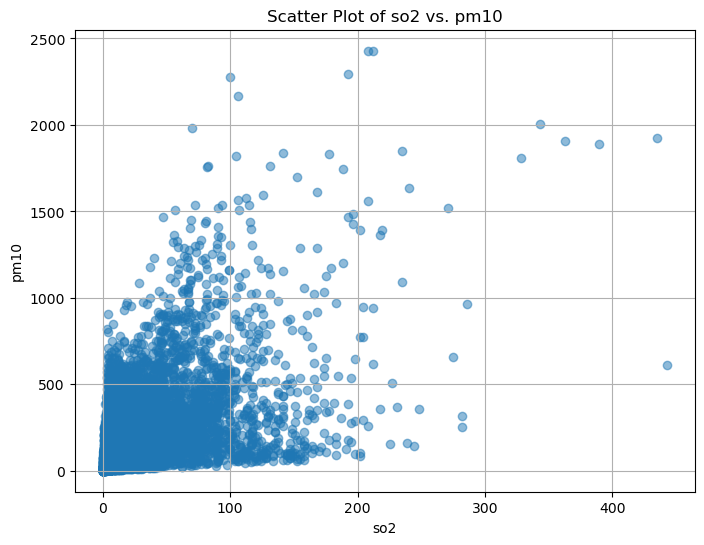

In [61]:
# A1 
# Scatter plot between two numeric data columns 

import matplotlib.pyplot as plt

feature1 = "so2"
feature2 = "pm10"

plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.5)
plt.title(f"Scatter Plot of {feature1} vs. {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.show()

In [62]:
# A2 & A3
# Linear Regression on the the same two columns used for the scatter plot

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose the independent and dependent variables
independent_variable = "so2"
dependent_variable = "pm10"

# Split the data into training and testing sets
X = df[[independent_variable]]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 18458.97


In [63]:
# A4
# Logistic Regression on the Text Classification Dataset

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv("lab3.csv")

# Creating similar size samples of ham and spam
ham = data[data['Category'] == 'ham']
spam = data[data['Category'] == 'spam']
ham = ham.sample(spam.shape[0])

# Now combine these to form a dataset.
dataset = pd.concat([ham, spam], ignore_index=True)

# Split for training and testing 
x_trn, x_tst, y_trn, y_tst = train_test_split(dataset['Message'], dataset['Category'], test_size=0.3)

from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x_trn = tfid.fit_transform(x_trn).toarray()
x_tst = tfid.transform(x_tst).toarray()

# Create the model and fit the data
model = LogisticRegression()

model.fit(x_trn, y_trn)
y_pred = model.predict(x_tst)

score = accuracy_score(y_tst, y_pred)

print(f"Accuracy score is: {score}")

Accuracy score is: 0.9621380846325167


In [64]:
# A5
# Using data from A1 for Regression Tree and k-NN Regressor

from sklearn.tree import DecisionTreeRegressor

# Data Processing
# Choose the independent and dependent variables
independent_variable = "so2"
dependent_variable = "pm10"

# Split the data into training and testing sets
X = df[[independent_variable]]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression Tree
regressiontree = DecisionTreeRegressor()

regressiontree.fit(X, y)

# Show prediction V/S true value for pm10 
prediction_regression_tree = pd.DataFrame()

prediction_regression_tree[independent_variable] = X_test
prediction_regression_tree[dependent_variable] = y_test

# Predict testing values
y_pred = regressiontree.predict(X_test)

prediction_regression_tree["Predicted-" + dependent_variable] = y_pred

# Calculate the mean squared error
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

prediction_regression_tree.head()

Mean Squared Error: 15854.92


,so2,pm10,Predicted-pm10
1052,5.01,146.83,64.929680
10462,4.65,25.41,77.050526
5219,5.78,103.12,76.875000
23048,6.14,109.31,78.222970
21805,8.46,55.66,103.030746


In [65]:
from sklearn.neighbors import KNeighborsRegressor

# k-NN Regressor
knn_regressor = KNeighborsRegressor() # 5 neighbours default

knn_regressor.fit(X, y)

# Show prediction V/S true value for pm10 
prediction_knn_regressor = pd.DataFrame()

prediction_knn_regressor[independent_variable] = X_test
prediction_knn_regressor[dependent_variable] = y_test

# Predict testing values
y_pred = knn_regressor.predict(X_test)

prediction_knn_regressor["Predicted-" + dependent_variable] = y_pred

# Calculate the mean squared error
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
prediction_knn_regressor.head()

Mean Squared Error: 18858.78


,so2,pm10,Predicted-pm10
1052,5.01,146.83,66.336
10462,4.65,25.41,46.068
5219,5.78,103.12,76.212
23048,6.14,109.31,56.472
21805,8.46,55.66,74.062
